
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Father Son
1 165    152
2 161    161
3 165    161
4 167    160
5 155    163
6 160    163

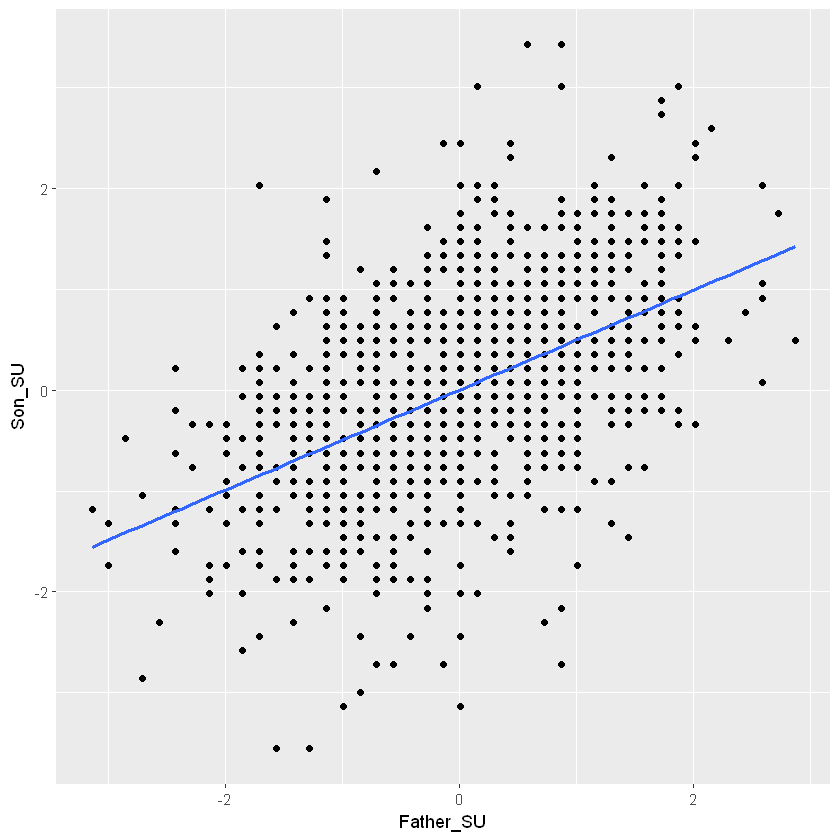

In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)

galton <- read.csv('C:/Users/Personal/Data-Science-Students/Tables/galton.csv', sep="\t",
                  stringsAsFactors=FALSE)

galton <- galton %>% mutate(Father = round(Father*2.54, 0), Son = round(Son*2.54,0))
head(galton)

galton <- galton %>% mutate(Father_SU = (Father - mean(Father))/sd(Father), Son_SU = (Son - mean(Son))/sd(Son))
ggplot(galton, aes(Father_SU, Son_SU)) + geom_point() + geom_smooth(method=lm, se = F)

 SU: 
 
 -> 1 up r
 
 Unidades originales: 
 
 -> SD_x up r*SD_y

In [2]:
rnorm(n = 1, mean = 0, sd = 1)

[1] 0.08583107

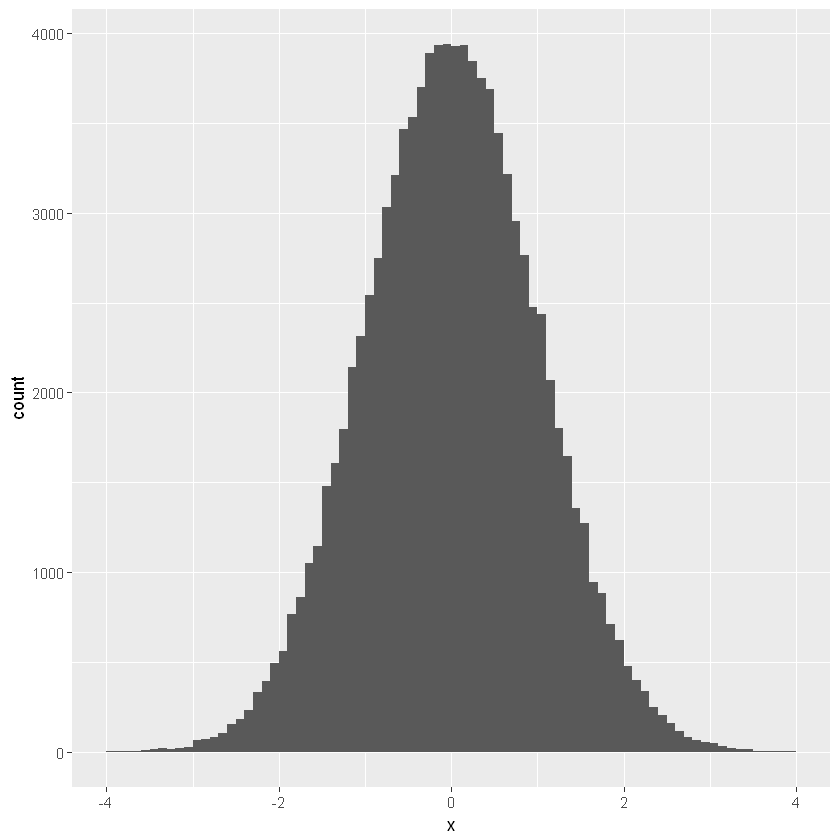

In [4]:
x <- rnorm(n = 100000, mean = 0, sd = 1)
x <- data.frame(x=x)

ggplot(x) + geom_histogram(aes(x), breaks = seq(-4,4,by=0.1))

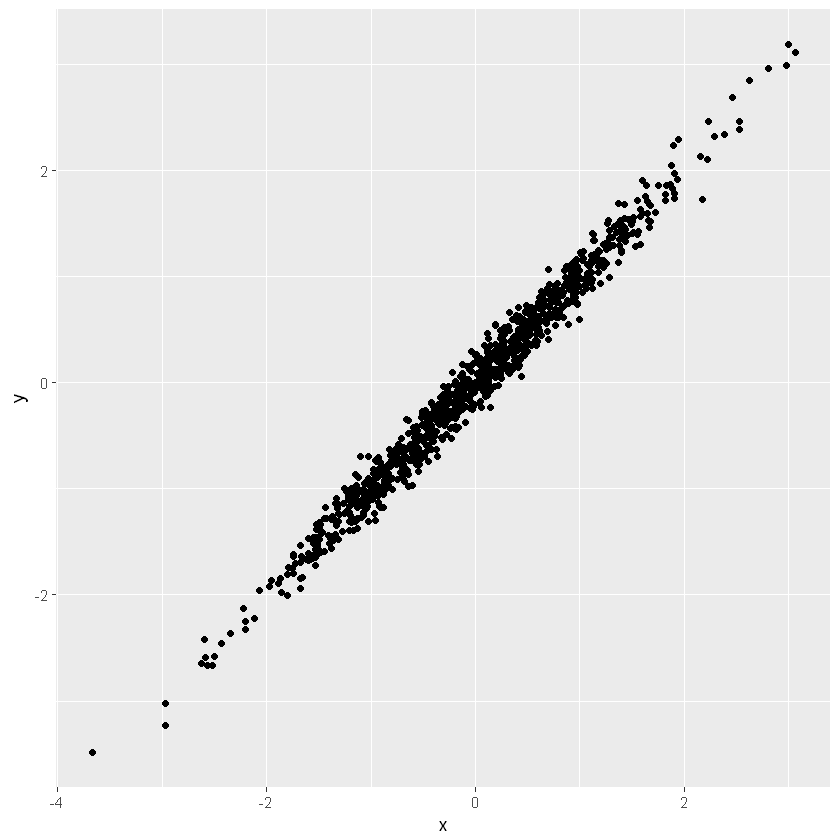

In [10]:
# Modelo Lineal
modLin <- function(x, r){
    n <- length(x)
    y <- r*x + rnorm(n = n, mean = 0, sd = 1)*(1-r^2)^0.5
    return(y)
}

x <- rnorm(n = 1000, mean = 0, sd = 1)
y <- modLin(x, 0.99)

linData <- data.frame(x=x, y=y)
qplot(x = x, y = y, data = linData)

# http://guessthecorrelation.com/

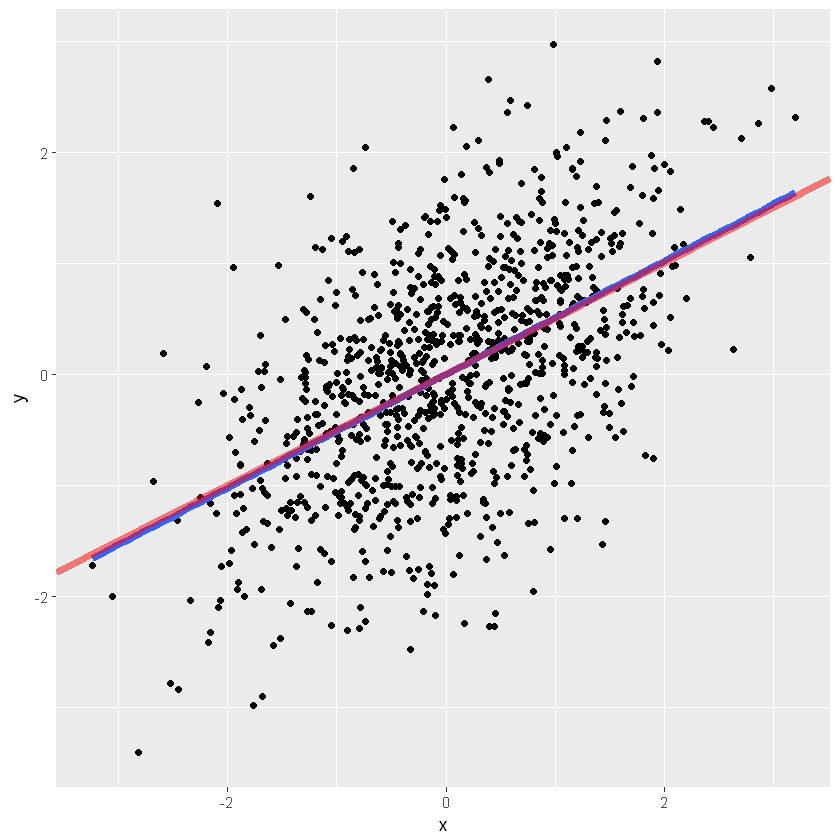

In [11]:
# Línea de regresión y modelo de regresión.
comparar <- function(n, r){
    x <- rnorm(n = n, mean = 0, sd = 1)
    y <- modLin(x, r)

    linData <- data.frame(x=x, y=y)
    
    ggplot(linData, aes(x, y)) + geom_point() + 
        geom_smooth(method=lm, se=F, size=2, alpha=0.5) + 
        geom_abline(slope = 0.5, intercept = 0, color="red", size=2, alpha=0.5) 
}

comparar(n=1000, r=0.5)

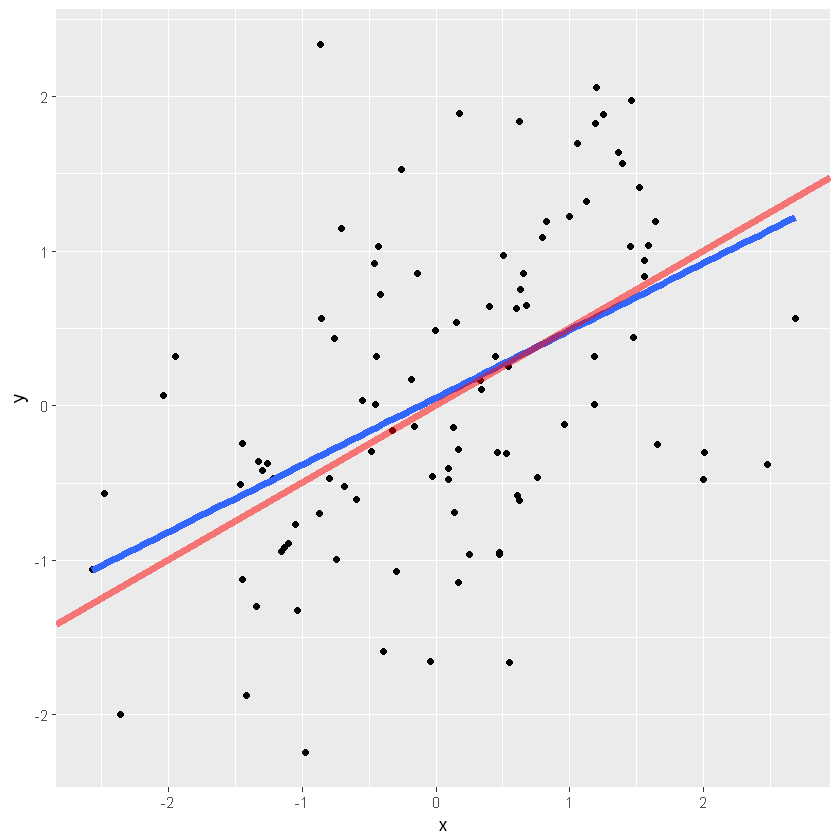

In [21]:
comparar(n=100, r=0.5)

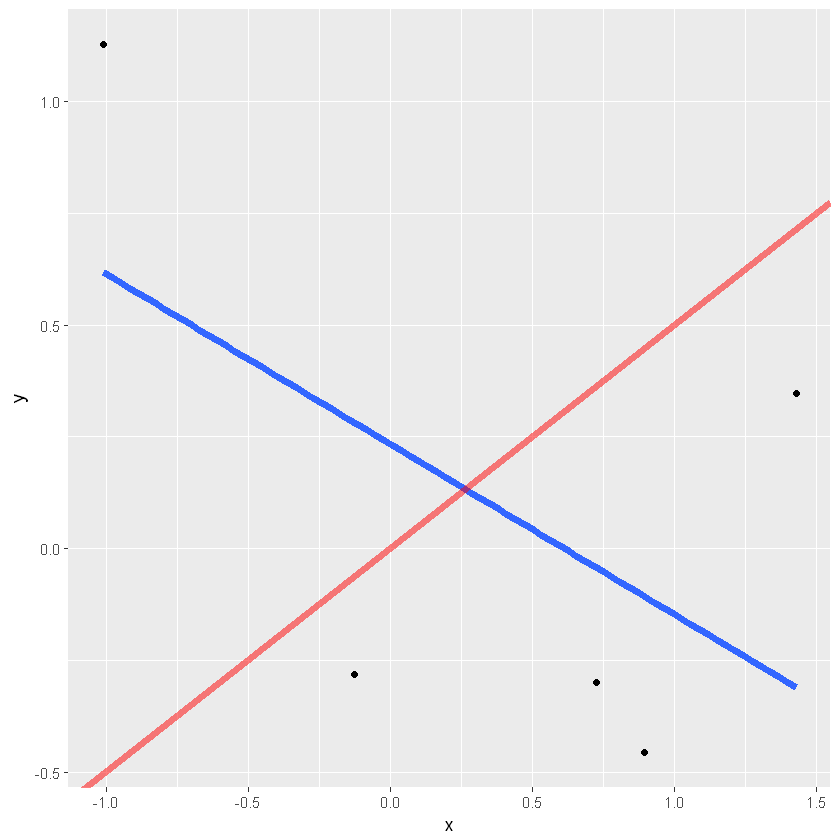

In [70]:
comparar(n=5, r=0.5)

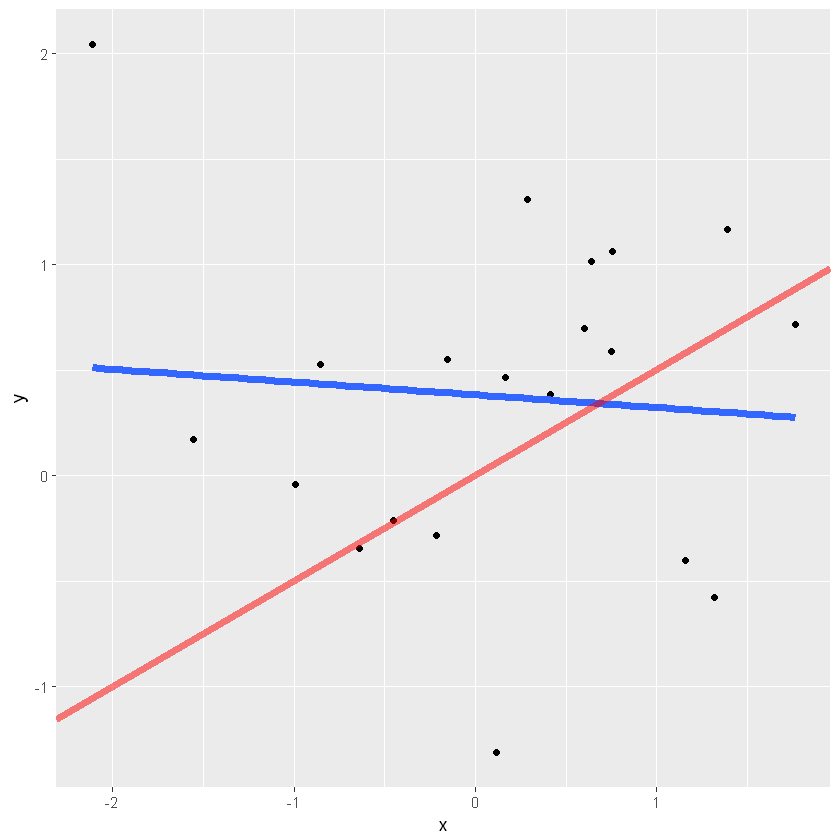

In [51]:
#poca señal
comparar(n=20, r=0.1)

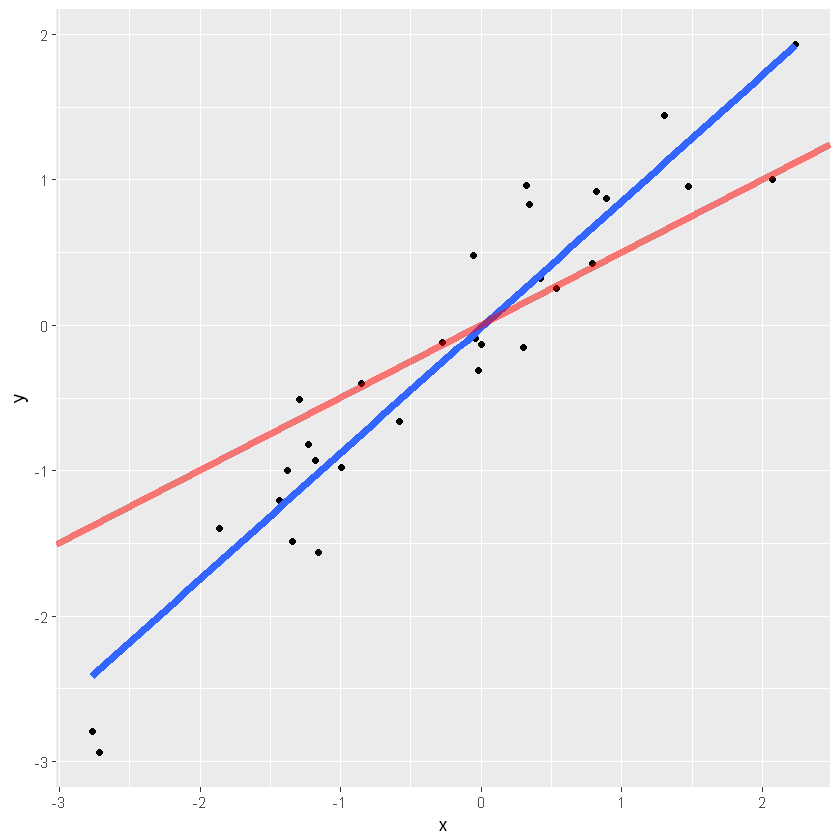

In [65]:
#mucha señal
comparar(n=30, r=0.9)

In [72]:
# http://www.stanford.edu/~kcobb/hrp261/
babies <- read.csv('C:/Users/Personal/Data-Science-Students/Tables/baby.csv', sep=",",
                  stringsAsFactors=FALSE)
head(babies)

X id headcir length bwt gestwks mage mnocig mheight mppwt fage fedyrs fnocig
1 1  4 13      20     7.3 37      33   25     66      140   37   12     25    
2 2  5 13      21     8.0 41      28    0     63      130   35   10      7    
3 3  6 13      21     7.5 39      32    0     61      126   38   12     17    
4 4  7 13      20     7.0 39      27    2     68      150   30   16      7    
5 5  8 13      19     5.3 37      32   17     67      112   28   10     17    
6 6 13 14      20     8.6 43      30    0     63      131   34   12     17    
  fheight X_OBSTAT_           
1 74      01101    0    0    0
2 71      01101    0    0    0
3 65      01101    0    0    0
4 73      01101    0    0    0
5 71      01101    0    0    0
6 66      01101    0    0    0

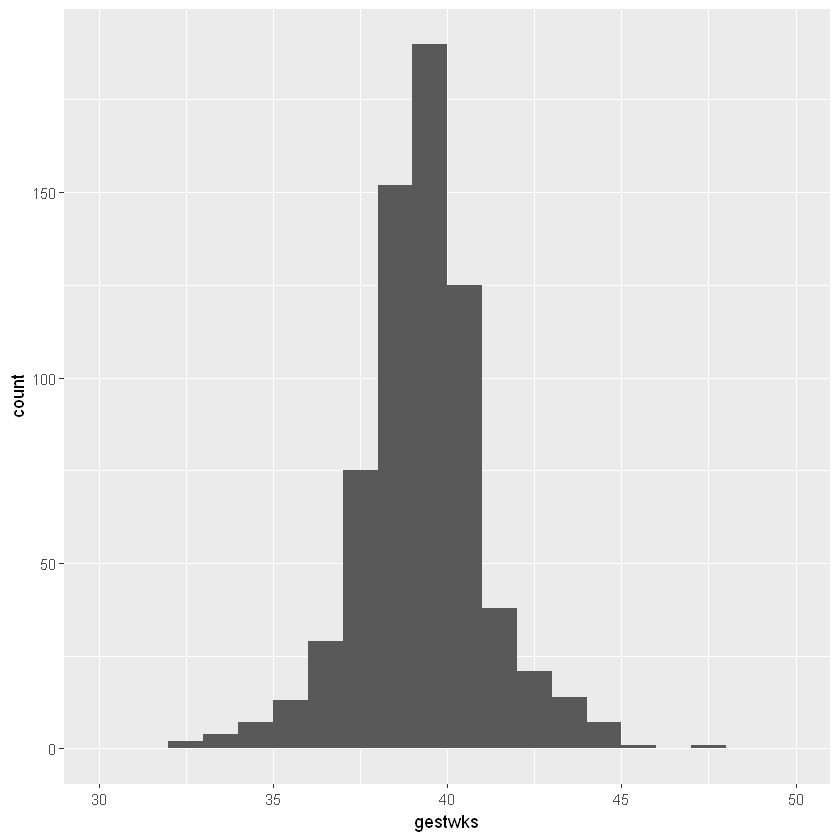

In [18]:
ggplot(babies) + geom_histogram(aes(gestwks), breaks=seq(30, 50, 1))

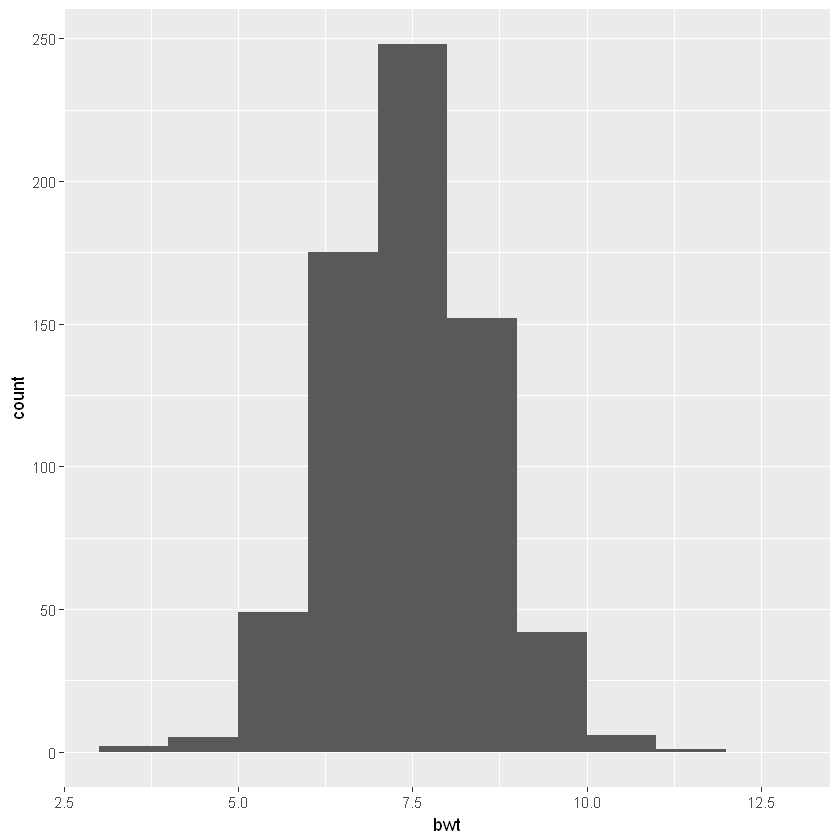

In [19]:
ggplot(babies) + geom_histogram(aes(bwt), breaks=seq(3, 13, 1))

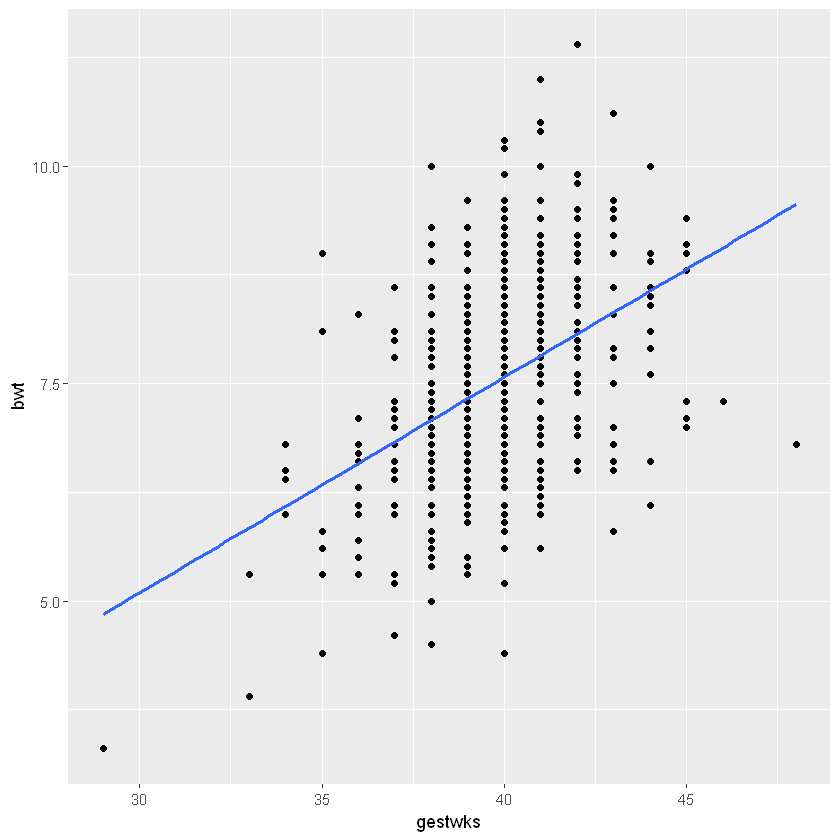

In [74]:
ggplot(babies, aes(gestwks, bwt)) + geom_point() + geom_smooth(method=lm, se=F)

In [82]:
modeloLin <- lm(formula = bwt~gestwks, data = babies)
modeloLin

0.248*35 - 2.348
predict.lm(modeloLin, newdata = data.frame(gestwks = c(35, 30, 12, 40)))


Call:
lm(formula = bwt ~ gestwks, data = babies)

Coefficients:
(Intercept)      gestwks  
     -2.348        0.248  


[1] 6.332

1         2         3         4 
6.3331791 5.0929847 0.6282845 7.5733736

In [85]:
varPred <- function(x){
    d <- vector('numeric')
    for(i in 1:1000){
        b100 <- babies %>% slice(sample(1:680, size = 10))
        modeloLin <- lm(formula = bwt~gestwks, data = b100)
        d[i] <- predict.lm(modeloLin, newdata = data.frame(gestwks = x))
    }
    return(data.frame(pred = d))
}


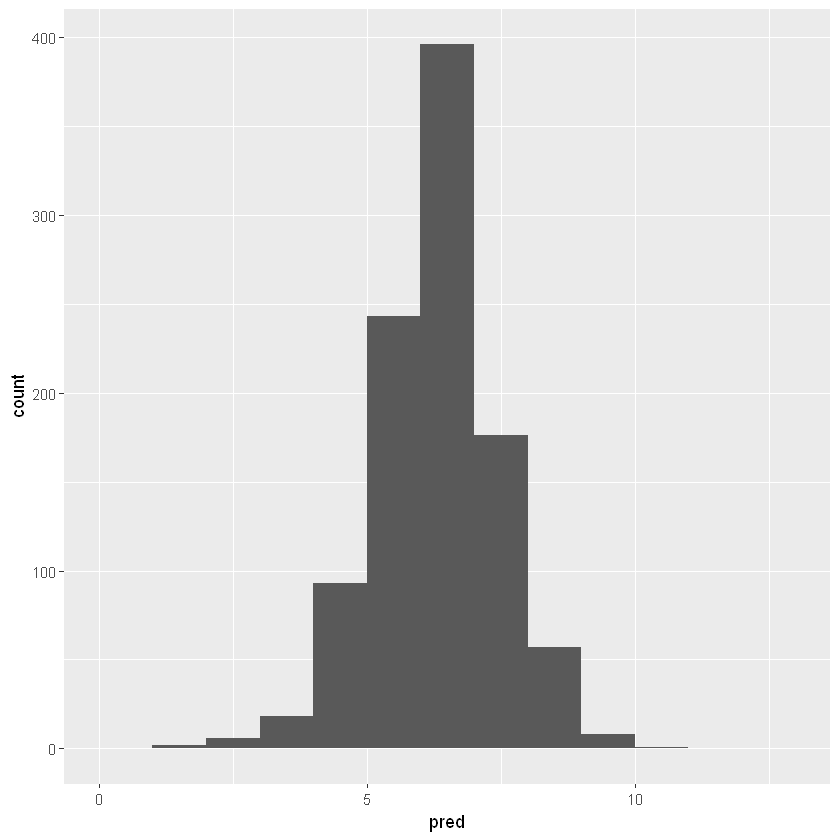

In [86]:
# preds están alrededor de 6.3 pero puede variar! Parece una dist. normal
# Pred se puede justificar si existe una relación linear. Pero pudo haber sido diferente si
# hubieramos usado otra muestra!

preds35 <- varPred(35)
qplot(x = pred, data = preds35, geom = "histogram", breaks=seq(0,13,1))

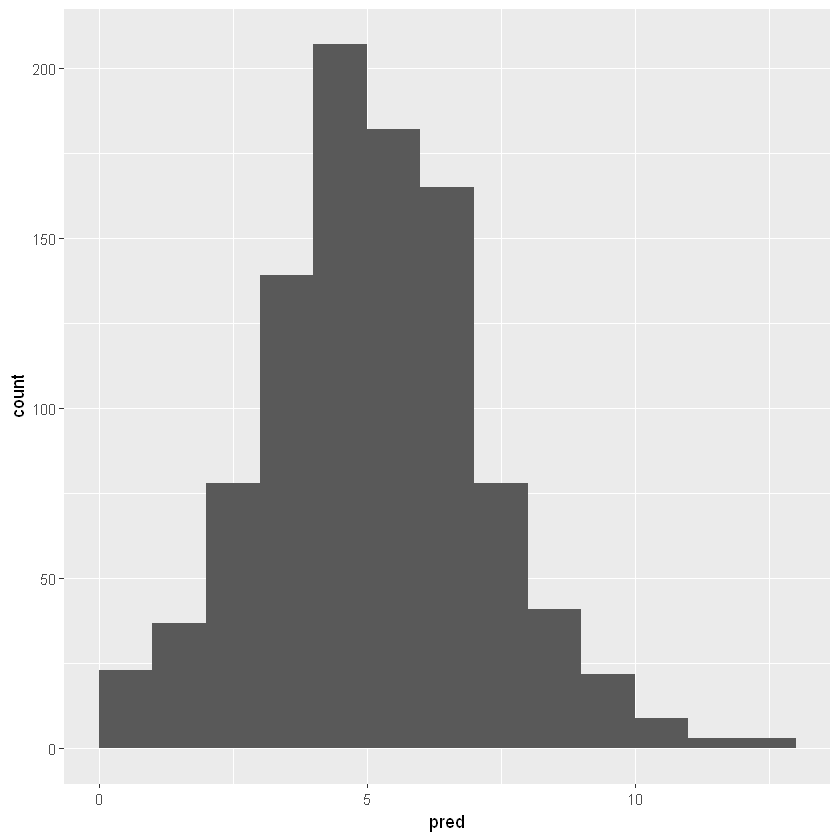

In [90]:
# aquí la pred es menos confiable! Los datos están mas difusa.
# mas variabilidad. Qué pasa?
preds35 <- varPred(30)
qplot(x = pred, data = preds35, geom = "histogram", breaks=seq(0,13,1))

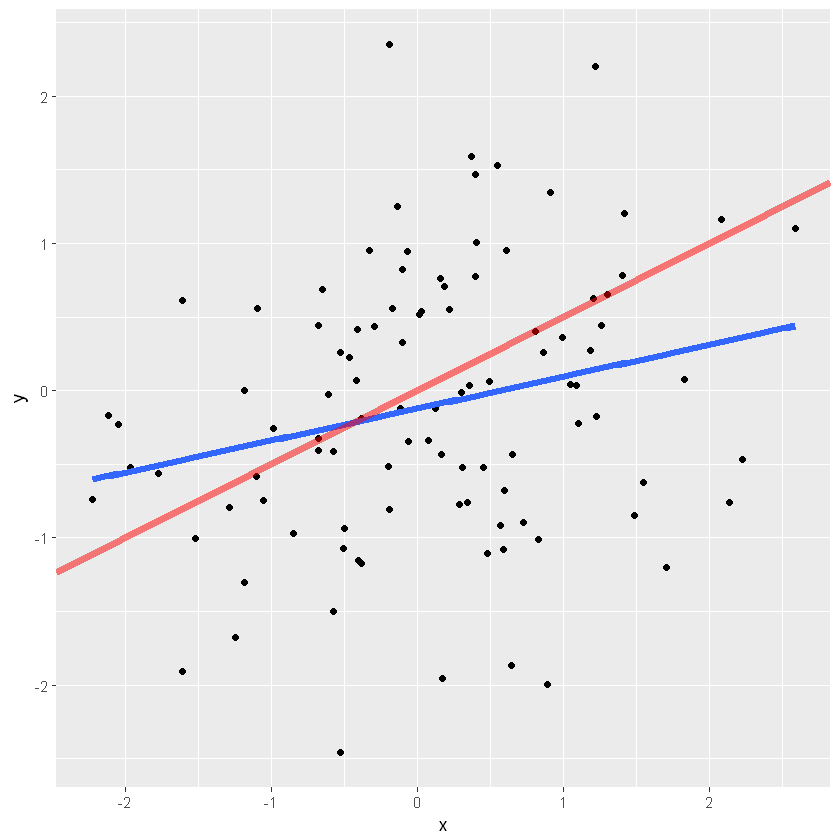

In [25]:
# cerca del centro las preds y los puntos están cerca.
# en los extremos hay mas variabilidad. 
comparar(n=100, r=0.24)

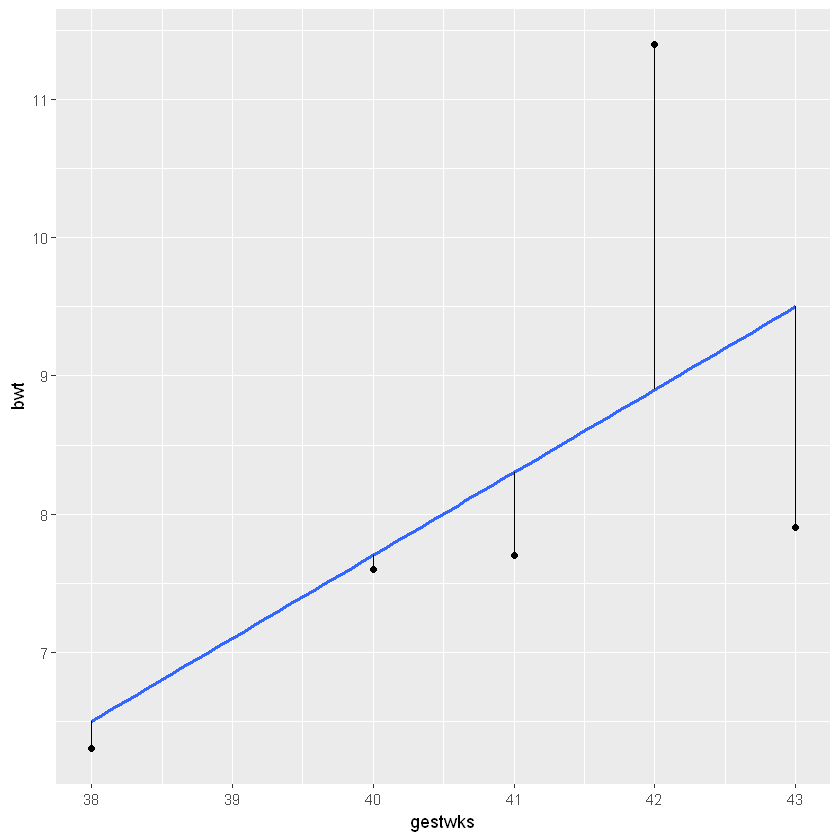

In [61]:
b10 <- babies %>% slice(sample(1:680, size = 5))
modeloLin10 <- lm(formula = bwt~gestwks, data = b10)
b10$pred <- modeloLin10$fitted.values

ggplot(b10, aes(gestwks, bwt)) + geom_point() + geom_smooth(method=lm, se=F) + 
    geom_segment(aes(xend = gestwks, yend = pred))